In [1]:
from Data_Core.experiment import *
%matplotlib notebook

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import *

# Load Data and remove baseline + normalize

In [2]:
from shutil import copy

folder = r'D:/Data_LIBS/Mapa_Gelfa_SLIC_65x65/'
folders_spot = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
current_experiment = experiment(folders_spot[0],ignore = '0000')
list_to_concatenate = []
for i in range(1,len(folders_spot)):
    print(i, ' of ', len(folders_spot),end='\r')
    new_experiment = experiment(folders_spot[i], ignore='0000')
    list_to_concatenate.append(new_experiment)
current_experiment.concatenate(list_to_concatenate)

In [3]:
for i in range(len(current_experiment.list_of_signals)):
    print('Removing baseline ' + str(i) + ' of ' +str(len(current_experiment.list_of_signals)),end='\r')
    current_experiment.list_of_signals[i].remove_baseline()
    current_experiment.list_of_signals[i].normalize()

# Sample Signal

<IPython.core.display.Javascript object>


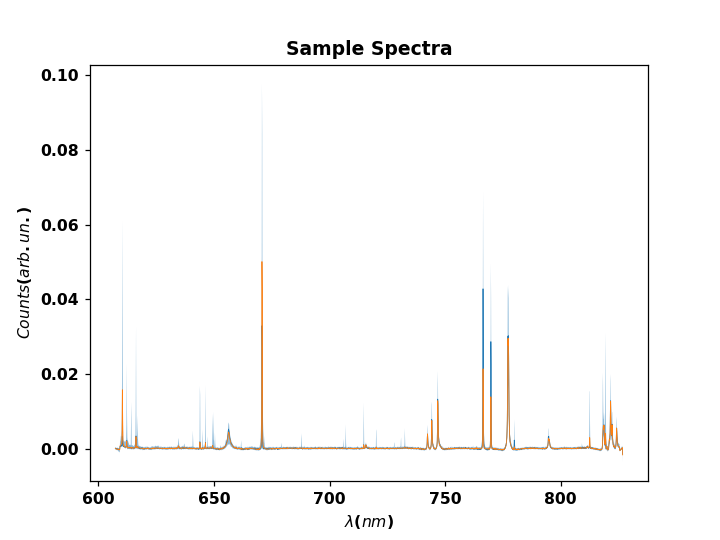

Text(0.5, 1.0, 'Sample Spectra')

In [4]:
ii=10
fig, ax = subplots()

ax.plot(current_experiment.list_of_signals[ii].wavelengths[0],
            current_experiment.list_of_signals[ii].spectrum[0],lw=0.5,alpha=1)
list_of_spectrums = [np.array(current_experiment.list_of_signals[i].spectrum[0]) for i in range(0,len(current_experiment.list_of_signals))]

ax.plot(current_experiment.list_of_signals[ii].wavelengths[0],
            np.mean(list_of_spectrums,axis=0),lw=0.5,alpha=1)

ax.fill_between(current_experiment.list_of_signals[ii].wavelengths[0],
            np.min(list_of_spectrums,axis=0),np.max(list_of_spectrums,axis=0),lw=0.5,alpha=0.5)

ax.fill_between(current_experiment.list_of_signals[ii].wavelengths[0],
            np.mean(list_of_spectrums,axis=0)-3*np.var(list_of_spectrums,axis=0),
                np.mean(list_of_spectrums,axis=0)+3*np.var(list_of_spectrums,axis=0),lw=0.5,alpha=0.5)

ax.set_xlabel(r'$\lambda(nm)$')
ax.set_ylabel(r'$Counts (arb.un.)$')
ax.set_title('Sample Spectra')

# Load mapa data
Disregard the map that appears at the end, most of the times is just a bad interpolation.
Basically this function computes the peak area, calculated at height h=ratio_of_maximum*maximum;

<IPython.core.display.Javascript object>


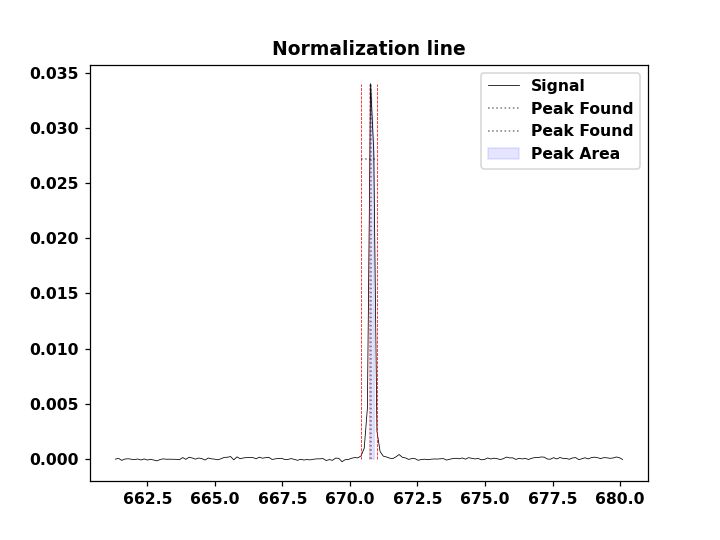

<IPython.core.display.Javascript object>


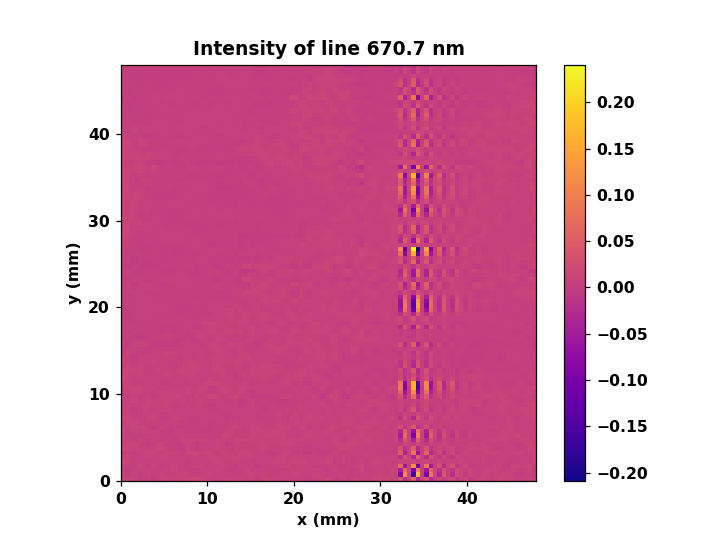

In [5]:
x_values,y_values,map_values1 = current_experiment.make_map(0,specific_wavelength = 670.7,ratio_of_maximum = 0.8, Plotline=True)

In [6]:
#correcting coordinates
x_values = np.array(x_values)
y_values = np.array(y_values)
x_values_old = np.copy(x_values)
x_values = y_values - np.min(y_values)# + 29.25
y_values = x_values_old

# for i in range(0,len(map_values1)):
#     if np.isnan(map_values1[i]):
#         print('WARNING: NAN found at ', i)

# Full resolution map

<IPython.core.display.Javascript object>


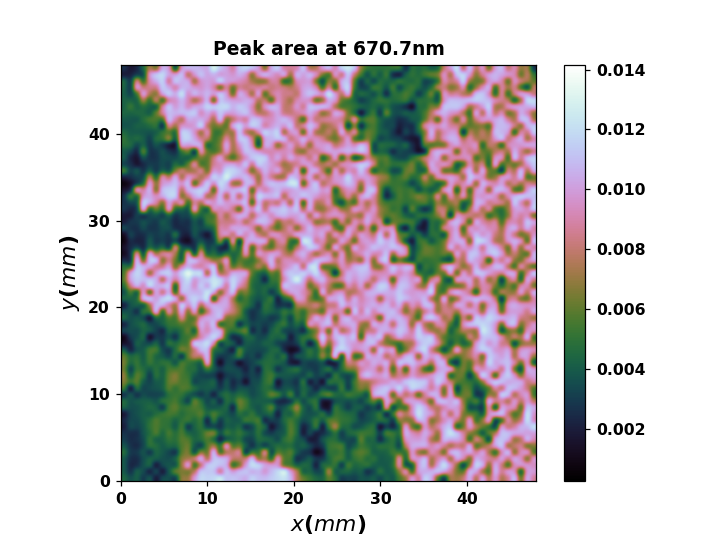

In [7]:
subplots()
title('Peak area at 670.7nm')
map_values_grid = np.array(map_values1)

map_values_grid = np.reshape(map_values_grid, (len(np.unique(x_values)),len(np.unique(y_values))))
imshow(map_values_grid, cmap = 'cubehelix', origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)],interpolation='gaussian')
ylabel('$y(mm)$',fontsize=14)
xlabel('$x(mm)$',fontsize=14)
colorbar()

<IPython.core.display.Javascript object>


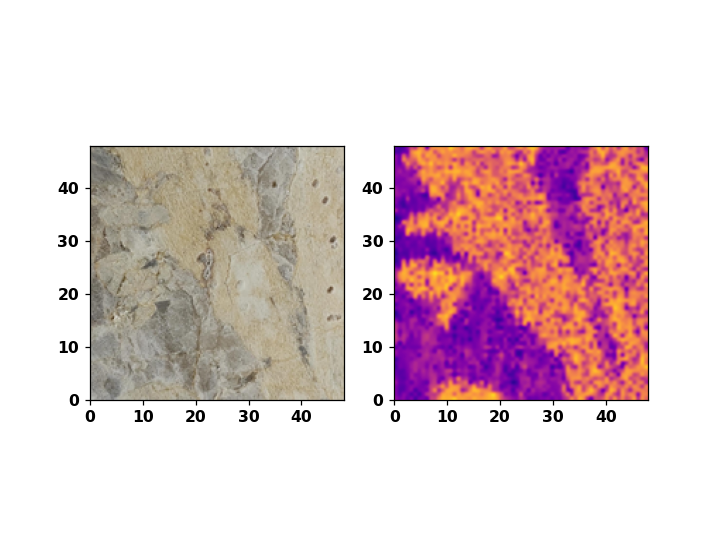

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import io

from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from matplotlib.pyplot import *
from skimage.measure import regionprops


image = io.imread('gelfa_65.png')
#image = io.imread('C:\\Users\\nunoa\\LIBS Core Dev\\AdaptativeMeshLIBS\\bife2.png')
img = img_as_float(image)
img = np.transpose(img,axes=(1,0,2))
img = img[::,::,:]

subplots()
title('Sample Image')
subplot(1,2,1)
imshow(img,origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)])
subplot(1,2,2)
imshow(map_values_grid, cmap = 'plasma', origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)],interpolation='gaussian')

# Simple PCA Analysis

In [155]:
list_of_spectrums = [np.array(current_experiment.list_of_signals[i].spectrum).flatten() for i in range(0,len(current_experiment.list_of_signals))]

<IPython.core.display.Javascript object>


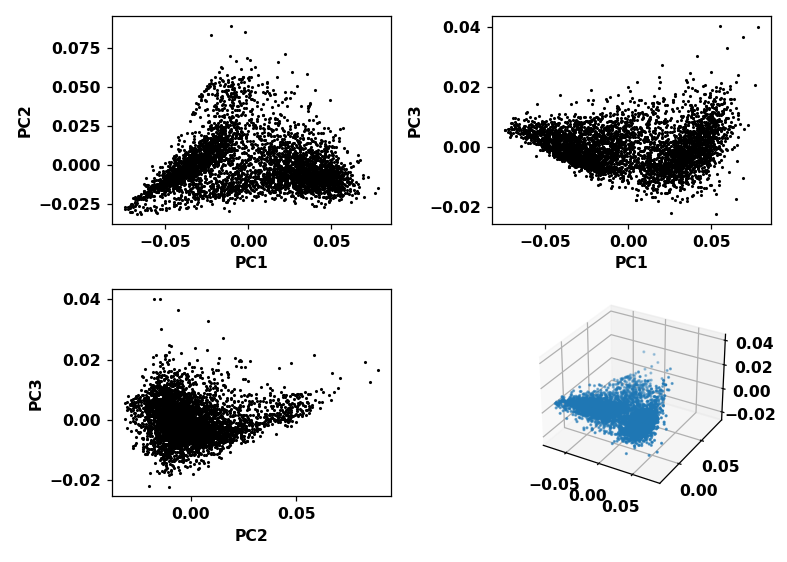

In [44]:
import sklearn 
import umap

ncomp = 5

model = sklearn.decomposition.PCA(n_components=ncomp)
#model = umap.UMAP( metric='euclidean', min_dist=0.1, n_components=ncomp,n_neighbors=10)

model.fit(list_of_spectrums)
pcs = model.transform(list_of_spectrums)

#####################
fig, axs = subplots(2,2, figsize = [7,5])
ax = axs[0,0]
ax.scatter(pcs[:,0],pcs[:,1],marker='o',s=1,color='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax = axs[0,1]
ax.scatter(pcs[:,0],pcs[:,2],marker='o',s=1,color='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

ax = axs[1,0]
ax.scatter(pcs[:,1],pcs[:,2],marker='o',s=1,color='k')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

axs[1,1].remove()
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter3D(pcs[:,0],pcs[:,1],pcs[:,2],s=1)

tight_layout()

<IPython.core.display.Javascript object>


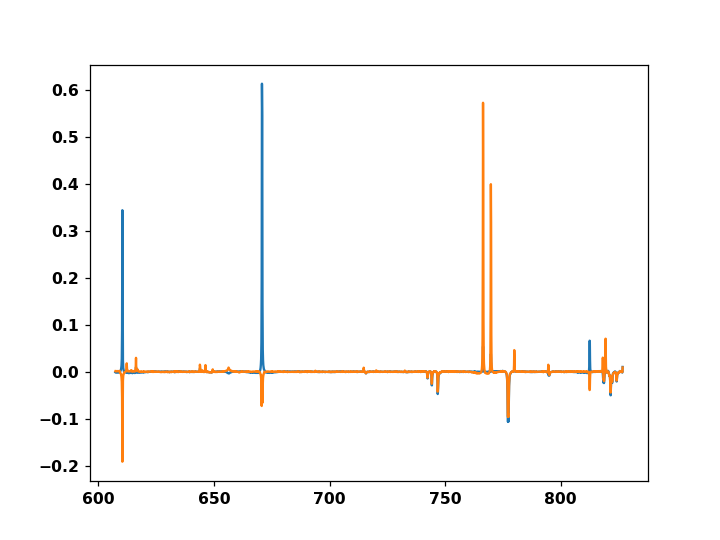

In [51]:
subplots()
plot(current_experiment.list_of_signals[i].wavelengths[0], model.components_[0])
plot(current_experiment.list_of_signals[i].wavelengths[0], model.components_[1])

<IPython.core.display.Javascript object>


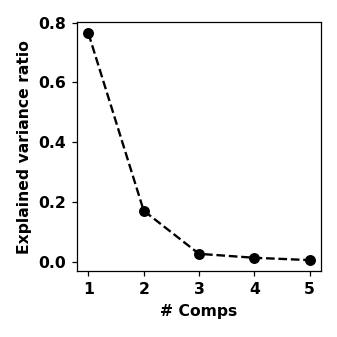

In [52]:
fig,ax = subplots(figsize=[3,3])
ax.plot(range(1,ncomp+1),model.explained_variance_ratio_,'o',ls='--',color='k')
ax.set_xlabel('# Comps')
ax.set_ylabel('Explained variance ratio')
tight_layout()

<IPython.core.display.Javascript object>


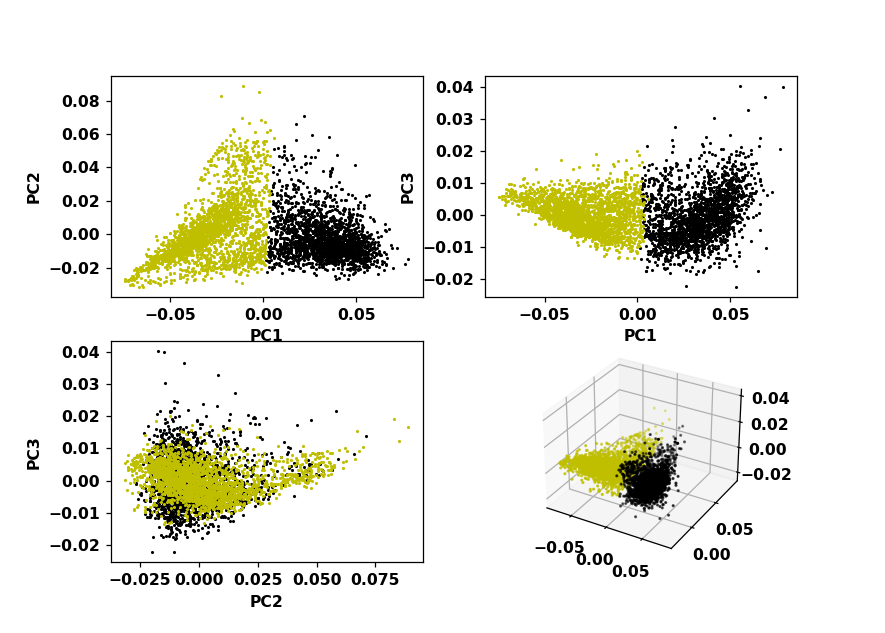

In [53]:
nclusters = 2

colors= ['k','y','orange','r']

cluster_model = sklearn.cluster.KMeans(n_clusters=nclusters)
cluster_model.fit(pcs)
cluster_index = cluster_model.predict(pcs)

#####################
fig, axs = subplots(2,2, figsize = [7,5])
ax = axs[0,0]
for i in range(0,nclusters):
    index = np.where(cluster_index==i)
    ax.scatter(pcs[index,0],pcs[index,1],marker='o',s=1,c=colors[i])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax = axs[1,0]
for i in range(0,nclusters):
    index = np.where(cluster_index==i)
    ax.scatter(pcs[index,1],pcs[index,2],marker='o',s=1,c=colors[i])
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')

ax = axs[0,1]
for i in range(0,nclusters):
    index = np.where(cluster_index==i)
    ax.scatter(pcs[index,0],pcs[index,2],marker='o',s=1,c=colors[i])
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')

axs[1,1].remove()
ax = fig.add_subplot(2, 2, 4, projection='3d')
for i in range(0,nclusters):
    index = np.where(cluster_index==i)
    ax.scatter3D(pcs[index,0],pcs[index,1],pcs[index,2],s=1,c=colors[i])



In [54]:
list_of_positions = [np.array(current_experiment.list_of_signals[i].position).flatten() for i in range(0,len(current_experiment.list_of_signals))]

<IPython.core.display.Javascript object>


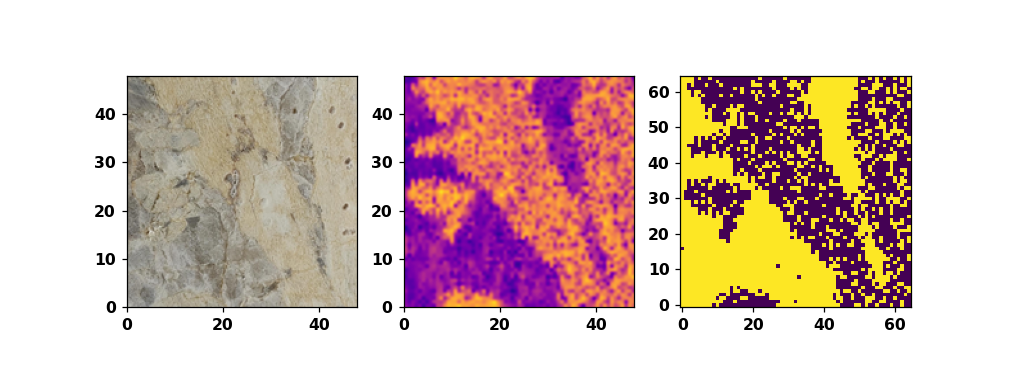

In [55]:
subplots(figsize=[8,3])
title('Sample Image')
subplot(1,3,1)
imshow(img,origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)])

subplot(1,3,2)
imshow(map_values_grid, cmap = 'plasma', origin = 'lower', 
       extent=[0,max(x_values),0, max(y_values)],interpolation='gaussian')

#######Cluster results
subplot(1,3,3)
lista=[]
for i in range(0,len(list_of_positions)):
    lista.append(np.array([list_of_positions[i][0],list_of_positions[i][1],cluster_index[i]]))
    
lista=np.array(lista)
lista = lista[lista[:,0].argsort()]
lista = lista[lista[:,1].argsort(kind='mergesort')]
lista2d = lista[:,2].reshape(len(np.unique(x_values)),len(np.unique(y_values)))
imshow(lista2d.transpose(),origin='lower')